<a href="https://colab.research.google.com/github/MagadeviS/ML--Regression-project/blob/main/ML_1_project_Seoul_Bike_Sharing_Demand_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name - Seoul Bike Sharing Demand Prediction**



### **Project Type** - Regression
### **Contribution** - Individual
### **Team Member**  - Magadevi S



#**Project Summary**

In this project, we train a model to predict the number of bike rentals at any hour of the year given the weather conditions.Regression techniques Decision Tree, Random Forest, Gradient Boosting Regressor, XGB Regressor are used to predict.

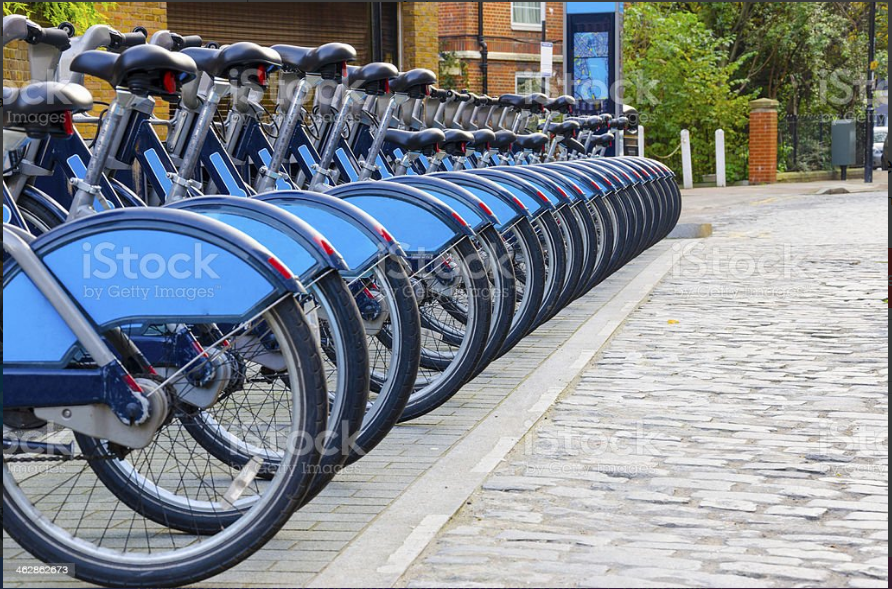


 ### **Data Pipeline:**

* Exploratory Data Analysis (EDA): In this part we have done some EDA on the features to see the trend.

*  Data Processing: In this part we went through each attributes and encoded the categorical features.

*  Model Creation: Finally in this part we created the various models. These various models are being analysed and we tried to study various models so as to get the best performing model for our project.

This statistical data analysis shows interesting outcomes in prediction method and also in an exploratory analysis.
First of all, we do EDA on the dataset and observe the following.

* Heat map shows Temperature is highly correlated. 
* Most number of bikes are rented on time 5pm to 9pm of the day and in morning at 8 pm.
* Most numbers of Bikes were rented in summer, followed by autumn, spring, and winter. 
* Most number of bikes are rented on Working day instead of holiday. 

### **Conclusion:**
*  Comparing all regression moddel, Thus Gradient Boosting Regression(GridSearchCV), Random forest(GridSearchCV) gives good r2 scores.

*  On Random Forest Regression model, with hyperparameter tuning we got r2 score as 90% on training data and 86% on test data.

*  On Gradient Boosting Regression model, with hyperparameter tuning we got r2 score as 92% on training data and 89% on test data.

# **GitHub Link -**

https://github.com/MagadeviS/

# **Problem Statement**


### <b> Problem Description </b>

#### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.

## <b> Data Description </b>

####  The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.


## <b>Attribute Information: </b>

* #### Date : year-month-day
* #### Rented Bike count - Count of bikes rented at each hour
* #### Hour - Hour of he day
* #### Temperature-Temperature in Celsius
* #### Humidity - %
* #### Windspeed - m/s
* #### Visibility - 10m
* #### Dew point temperature - Celsius
* #### Solar radiation - MJ/m2
* #### Rainfall - mm
* #### Snowfall - cm
* #### Seasons - Winter, Spring, Summer, Autumn
* #### Holiday - Holiday/No holiday
* #### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from datetime import datetime
import datetime as dt

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MultiLabelBinarizer

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import log_loss

import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [ ]:
# Load Dataset
#let's mount the google drive for import the dataset
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
#load the seol bike data set from drive
df=pd.read_csv('/content/drive/MyDrive/ML- Regression Project/SeoulBikeData.csv',encoding= 'unicode_escape',parse_dates=['Date'])

### Dataset First View

In [ ]:
# Dataset First Look
# First five rows of dataset
df.head()


In [ ]:
# Last five rows of dataset
df.tail()

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
df.shape

### Dataset Information

In [ ]:
# Dataset Information
df.info()

#### Duplicate Values

In [ ]:
# Count of duplicated values in dataset
df.duplicated().sum()

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df.info()

In [ ]:
# Visualizing the missing values
import missingno as msno
msno.bar(df)

* We can also find there are no missing values or null values in the data set by the above visualization chart.

### What did you know about your dataset?




* From the above data, there are 14 Columns and 8760 Rows in the Dataset. 
*  After counting the missing/null values and duplicate value we came to know that there are no missing and duplicate values present.



## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
print("Dataset column names:",df.columns)

In [ ]:
# Dataset Describe
df.describe()

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
df.nunique()

## ***3. Data Wrangling Code***

### ***Changing column name***

Some of the columns name in the dataset are too large and clumsy so we change the into some simple name, and it don't affect our end results.

In [ ]:
# Rename complex column names:
df=df.rename(columns={'Rented Bike Count':'Rented_Bike_Count',
                                'Temperature(°C)':'Temperature',
                                'Humidity(%)':'Humidity',
                                'Wind speed (m/s)':'Wind_speed',
                                'Visibility (10m)':'Visibility',
                                'Dew point temperature(°C)':'Dew_point_temperature',
                                'Solar Radiation (MJ/m2)':'Solar_Radiation',
                                'Rainfall(mm)':'Rainfall',
                                'Snowfall (cm)':'Snowfall',
                                'Functioning Day':'Functioning_Day'})

In [ ]:
# Dataset Describe
df.describe()


*   The "Date" column as a object type basically it reads as a string, as the date column is very important to analyze the users behaviour so we need to convert it into datetime format then we split it into 3 column i.e 'year', 'month', 'day'as a category data type.

In [ ]:
df['day'] = df["Date"].dt.day_name() # extract week name from Date column
df["Month"] = df["Date"].dt.month_name()   # extract month name from Date column
df["year"] = df["Date"].map(lambda x: x.year)    # extract year from Date column

In [ ]:
#creating a new column of "weekdays_or_weekend" 
df['weekdays_or_weekend']=df['day'].apply(lambda x : 1 if x=='Saturday' or x=='Sunday' else 0 )

* The "year" column in our data set is basically contain the 2 unique number contains the details of from 2017 december to 2018 november so if i consider this is a one year then we don't need the "year" column so we drop it.
* The other column "day", it contains the details about the each day of the month, for our relevence we don't need each day of each month data but we need the data about, if a day is a weekday or a weekend so we convert it into this format and drop the "day" column.

In [ ]:
# Drop the column "Date","day","year"
df=df.drop(columns=['day','year','Date'],axis=1)
df.info()

*  As "Hour","month","weekdays_weekend" column are show as a integer data type but actually it is a category data tyepe. so we need to change this data tyepe if we not then, while doing the further anlysis and correleted with this then the values are not actually true so we can mislead by this.

In [ ]:
df.info()

### *Observed Infomation:*


*   There are 15 Columns and 8760 Rows in the Dataset.
* In a day we have 24 hours and we have 365 days a year so 365 multiplied by 24 = 8760, which represents the number of line in the dataset.
*   There are 12 No of Numerical Variables and 3 No of Categorical variables
*   There No Null Values present in the Dataset.



## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

**Why EDA is required in data analysis?**
* EDA is applied to investigate the data and summarize the key insights. It will give you the basic understanding of your data, it's distribution, null values and much more. You can either explore data using graphs or through some python functions.

**Dependent Variable**
* A dependent variable is a variable whose value will change depending on the value of another variable.



### **Analysation of categorical variables**
* Categorical variables represent types of data which may be divided into groups.

* Our dependent variable is "Rented Bike Count" so we need to analysis this column with the other columns by using some visualisation plot.

* First we analyze the category data type and  then proceed with the numerical data type.

#### **Chart - 1 :  weekdays_or_weekend**

In [ ]:
#analysis of Count of Rented bikes acording to weekdays and weekend by vizualisation
fig,ax=plt.subplots(figsize=(10,8))
sns.barplot(data=df,x='weekdays_or_weekend',y='Rented_Bike_Count',ax=ax,ci = 0)
ax.set(title='Count of Rented bikes acording to weekdays and weekend ')
     

##### **1. Why did you pick the specific chart?**

With categorical data,a bar chart is typically your best option. A bar chart places the separate values of the data on the x-axis and the height of the bar indicates the count of that category.

##### **2. What is/are the insight(s) found from the chart?**

From the above bar plot, we can be say that in the "week days" which represent in "blue colur" show that the demand of the bike higher because of the people are going office in week days only.


##### **3. Will the gained insights help creating a positive business impact?** 
**Are there any insights that lead to negative growth? Justify with specific reason.**

From the Chart, we can observe that there is high demand for bike rental during weekdays.

### **Chart-2 : Holiday**

In [ ]:
#anlysis of Count of Rented bikes acording to Holiday by vizualisation
data=df.groupby(df['Holiday'])['Rented_Bike_Count'].sum().reset_index()['Rented_Bike_Count']
print(data)

In [ ]:
fig, ax = plt.subplots(figsize =(8, 8))
plt.pie(data,autopct='%1.0f%%',labels =['Holiday','No Holiday'],explode=(0.1,0.0009))
ax.set_title('Count of Rented bikes acording to Holiday or No Holiday')

In [ ]:
#anlysis of Count of Rented bikes acording to Holiday by vizualisation
fig,ax=plt.subplots(figsize=(20,8))
sns.lineplot(data=df,x='Hour',y='Rented_Bike_Count',hue='Holiday',ax=ax)
ax.set(title='Count of Rented bikes acording to Holiday')
     

##### **1. Why did you pick the specific chart?**

A pie chart is preferred when you have a small data set and you want to show the percentages of a whole.

line plots can be more useful than bar plots for focusing comparisons between different levels of one or more categorical variables.


##### **2. What is/are the insight(s) found from the chart?**

In the above bar plot and point plot , it clearly shows that people mostly use the rantal bike on "non-Holiday" days. 

##### **3. Will the gained insights help creating a positive business impact?** 
**Are there any insights that lead to negative growth? Justify with specific reason.**

On "No Holiday" days people use the rental bike from 6am-10am and 5pm-10pm.

On "holiday" days people use the rental bike from 2pm-8pm , So the demand for bike rental timing varies from "holiday" and "no holiday" days.

### **Chart 3 : Functioning_Day**

In [ ]:
#analysis of data by vizualisation
fig,ax=plt.subplots(figsize=(10,8))
sns.barplot(data=df,x='Functioning_Day',y='Rented_Bike_Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to Functioning Day ')

In [ ]:
# Chart - 5 visualization code
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(20,8))
sns.pointplot(data=df,x='Hour',y='Rented_Bike_Count',hue='Functioning_Day',ax=ax)
ax.set(title='Count of Rented bikes acording to Functioning Day ')

##### **1. Why did you pick the specific chart?**

When smaller changes exist, point plots are better to use than bar graphs. point plots can also be used to compare changes over the same period of time for more than one group.

##### **2. What is/are the insight(s) found from the chart?**

In the above two plots are shows that, whether the rented bike used or not in functioning days.


##### **3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.**

Now we can observe from that, On a non functioning day, no bikes are rented in all the instances of the data.

### **Chart 4 : Seasons**

In [ ]:
# Chart - 6 visualization code
#Seasons wise Rented bike count
bike_vs_seasons=df.groupby(df['Seasons'])['Rented_Bike_Count'].sum()
fig,ax=plt.subplots(figsize=(10,8))
sns.barplot(data=df,x='Seasons',y='Rented_Bike_Count',ax=ax,ci=0)
ax.set(title='Count of Rented bikes acording to Seasons ')

In [ ]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(20,8))
sns.lineplot(data=df,x='Hour',y='Rented_Bike_Count',hue='Seasons',ax=ax)
ax.set(title='Count of Rented bikes acording to seasons ')


##### **1. Why did you pick the specific chart?**

line plots and bar plots both can be more useful for focusing comparisons between different levels of one or more categorical variables.

##### **2. What is/are the insight(s) found from the chart?**

In the above bar plot and point plot which shows the use of rented bike in in four different seasons, and it clearly shows that In summer season the use of rented bike is high and peak time is 7am-9am and 7pm-5pm.

In winter season the use of rented bike is very low because of snowfall.

##### **3. Will the gained insights help creating a positive business impact?Are there any insights that lead to negative growth? Justify with specific reason.**

The demand for rental bike is high in summer season and low in winter season. So focus should be on providing more bikes on summer season.

### **Chart 5 : Month**

In [ ]:
# Chart - 7 visualization code
#anlysis of Rented bike by monthwise
fig=plt.figure(figsize=(14,8))
ax=plt.gca()
sns.barplot(data=df,x='Month',y='Rented_Bike_Count',ax=ax,ci = 0)
ax.set(title='Count of Rented bikes acording to Month ')
     

We dropped the column "weekdays_or_weekend", Which was created to do EDA.

In [ ]:
#drop those column beacause we created this to do some EDA:
df=df.drop(columns=['weekdays_or_weekend'],axis=1)

##### **1. Why did you pick the specific chart?**

A bar diagram makes it easy to compare sets of data between different groups at a glance.

Bar charts can also show big changes in data over time.

##### **2. What is/are the insight(s) found from the chart?**

 From the above bar plot, It can be clearly said that from  the demand for bike rental higher from the month "may" to "October" as compared to other months and these months fall within the summer season.

### **Analysing the Distribution of Numerical variables**

### **Chart - 6 : All Numerical variables**

In [ ]:
# print all numerical features in the data set
numeric_features = df.describe().columns[1:]
print("Numeric_features :",numeric_features)

In [ ]:
# Chart - 6 visualization code
for col in numeric_features:
  plt.figure(figsize=(10,5))
  sns.distplot(df[col])
  plt.axvline(df[col].mean(), color='magenta', linestyle='dashed', linewidth=2)
  plt.axvline(df[col].median(), color='cyan', linestyle='dashed', linewidth=2)
  plt.title(col+' distribution')
  plt.show()

##### 1. Why did you pick the specific chart?

A Distplot or distribution plot, depicts the variation in the data distribution. Seaborn Distplot represents the overall distribution of continuous data variables. The Seaborn module along with the Matplotlib module is used to depict the distplot with different variations in it.

##### 2. What is/are the insight(s) found from the chart?

* Normally distributed attributes: temperature, humidity, Dew point temperature(°C).
* Positively skewed attributes: wind_speed, solar_radiation, snowfall, rainfall.
* Negatively skewed attributes: visibility.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

* People like to ride bikes when it is pretty hot around 25°C in average.
* 'Dew_point_temperature' is almost same as the 'temperature' there is some similarity present.
* The bike rental is very limited when there is heavy snow.
* The demand for rental bike is uniformly distributed despite the wind speed and  the demand for bike is also increasing which means that it is clear that people prefer to ride bike when there is little wind.

### **Chart - 7 : Regression plot of Numerical variables with Rented Bike count**

In [ ]:
# printing all the numerical features
num_col=set(df.describe().columns.to_list())-{'Rented Bike Count'}
print(num_col)

In [ ]:
# printing the regression plot for all the numerical features
for col in num_col:
  fig,ax=plt.subplots(figsize=(10,6))
  sns.regplot(x=df[col],y=df['Rented_Bike_Count'],scatter_kws={"color": 'red'}, line_kws={"color": "black"})

##### 1. Why did you pick the specific chart?

* The regression plots in seaborn are primarily intended to add a visual guide that helps to emphasize patterns in a dataset during exploratory data analyses. Regression plots as the name suggests creates a regression line between 2 parameters and helps to visualize their linear relationships.

* Regression analysis is a powerful statistical method that allows you to examine the relationship between two or more variables of interest.

##### 2. What is/are the insight(s) found from the chart?

* Positively related to the target variable : 'Temperature', 'Wind_speed','Visibility', 'Dew_point_temperature', 'Solar_Radiation'

* Negatively related with the target variable : 'Rainfall','Snowfall','Humidity'

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

* From the above regression plot of all numerical features we see that the columns  'Temperature', 'Wind_speed','Visibility', 'Dew_point_temperature', 'Solar_Radiation' are positively relation to the target variable,which means the rented bike count increases with increase of these features.

* 'Rainfall','Snowfall','Humidity' these features are negatively related with the target variaable which means the rented bike count decreases when these features increase.

### **Chart - 8 : Correlation Heatmap**

In [ ]:
# Correlation with Rented Bike Count
df.corr()['Rented_Bike_Count']

#### **Seaborn Heatmap:**

In [ ]:
# Correlation Heatmap visualization 
# using seaborn heatmap for ploting correlation graph 
fig=plt.figure(figsize=(10,5))
ax=plt.gca()
sns.heatmap(abs(df.corr()),ax=ax,annot=True)


##### 1. Why did you pick the specific chart?

A heatmap is a graphical representation where individual values of a matrix are represented as colors. A heatmap is very useful in visualizing the concentration of values between two dimensions of a matrix. This helps in finding patterns and gives a perspective of depth.

##### 2. What is/are the insight(s) found from the chart?

* From the Heat map, we got high Corelation Between Temperature and Dew Point Temperatue.

#### **Checking Multicollinearity:**

In [ ]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):
 
   # Calculating VIF
   vif = pd.DataFrame()
   vif["variables"] = X.columns
   vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
 
   return(vif)
     

In [ ]:
#Check Multicollinearity of Numerical Columns
calc_vif(df[[i for i in df.describe().columns if i not in ['Rented_Bike_Count']]])

The "Temperature(°C)" column contains high VIF value, so we need to remove the column.

In [ ]:
#Check Multicollinearity of Numerical Columns by Removing High VIF value of column Temperature
calc_vif(df[[i for i in df.describe().columns if i not in ['Rented Bike Count','Temperature']]])

In [ ]:
#final Numerical Columns
num_col_list=list(num_col-{'Temperature'})
num_col_list

In [ ]:
#Final Numerical Column Dataset
num_col_df=df[num_col_list]
num_col_df

### **Observation:**
* When checking Multocollinearity using Variance Infuance Factor, Temperature has the highest VIF value. So we removed it.

## ***5. Feature Engineering & Data Pre-processing***

### **5.1 Handling Missing Values**

In [ ]:
# Handling Missing Values
df.isna().sum().sum()


 There are no missing values or null values present in the data set.


### **5.2 Handling Outliers - Normalise Target variable (Rented_Bike_Count)**

* Data normalization is a set of techniques and rules used to improve the consistency of data, standardize it, and maintain its integrity. The process removes any redundancies or duplicates in the database and reduces the storage space requirements.

* The goal of normalization is to transform features to be on a similar scale. This improves the performance and training stability of the model.

In [ ]:
#Distribution plot of Rented Bike Count
plt.figure(figsize=(8,4))
plt.xlabel('Rented Bike Count')
plt.ylabel('Density')
ax=sns.distplot(df['Rented_Bike_Count'],hist=True ,color="b")
ax.axvline(df['Rented_Bike_Count'].mean(), color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(df['Rented_Bike_Count'].median(), color='black', linestyle='dashed', linewidth=2)
plt.show()

The above graph shows that Rented Bike Count has moderate right skewness. Since the assumption of linear regression is that 'the distribution of dependent variable has to be normal', so we should perform some operation to make it normal.

In [ ]:
#Boxplot of Rented Bike Count to check outliers
plt.figure(figsize=(8,4))
sns.boxplot(x=df['Rented_Bike_Count'])
plt.show()

* From the boxplot, we can detect outliers present in the Rented Bike Count column.

In [ ]:
#Finding Normalize Plot 
fig,axes = plt.subplots(1,3,figsize=(14,4))
sns.distplot(np.log10(df['Rented_Bike_Count']+0.0000001),ax=axes[0],color='red').set_title("log 10")
sns.distplot((df['Rented_Bike_Count']**2),ax=axes[1],color='blue').set_title("square")
sns.distplot(np.sqrt(df['Rented_Bike_Count']),ax=axes[2], color='green').set_title("Square root")

After applying  the square root to the skewed Rental Bike Count, here we get an almost normal distribution.

In [ ]:
#After applying sqrt on Rented Bike Count check wheater we still have outliers 
plt.figure(figsize=(8,4))
plt.ylabel('Rented_Bike_Count')
sns.boxplot(x=np.sqrt(df['Rented_Bike_Count']))
plt.show()

##### What all outlier treatment techniques have you used and why did you use those techniques?

* **Box plot** - Box plots are used to show distributions of numeric data values, especially when you want to compare them between multiple groups. They are built to provide high-level information at a glance, offering general information about a group of data's symmetry, skew, variance, and **outliers**.

* **Square Root Transformation** - The square root method is typically used when your data is moderately skewed. Now using the square root (e.g., sqrt(x)) is  a transformation that has a moderate effect on distribution shape. It is generally used to reduce **right skewed** data.
   Finally, the square root can be applied on target variable because of which is right  skewed.

### **Observation:**
* In the Distribution Plots above, the Squre Root of Target variable perfectly fitted a normal Distribution compared to log and squre.

### **5.3 Categorical Encoding - Dealing with Categorical Columns**

In [ ]:
# Categorical Columns List
cat_col_list=df.describe(include=['object','category']).columns.to_list()
cat_col_list


In [ ]:
new_cat_col=df[cat_col_list]
new_cat_col

### **One hot encoding**
* One hot encoding is a technique used to represent categorical variables as numerical values in a machine learning model.

In [ ]:
# Encode your categorical columns
encoders_nums = {"Holiday":{"Holiday":1,"No Holiday":0},
                 "Functioning_Day":{"Yes":1,"No":0}}

new_cat_col = new_cat_col.replace(encoders_nums)     

In [ ]:
# Creating Dummy variable: 
cat_col_df= pd.get_dummies(new_cat_col, columns=["Seasons","Month"])
cat_col_df


#### What all categorical encoding techniques have you used & why did you use those techniques?

* **One hot encoding** - In this technique, the categorical parameters will prepare separate columns for both 'holiday' and 'no holiday' values. So, wherever there is 'Holiday' the value will be 1 and for  Nno Holiday' the value will be 0. For Funtioning day column, wherever there is 'Yes' the value will be 1 and for  'No' the value will be 0.
* **Creating Dummy Variable** - A dummy variable (also known as indicator variable or just dummy) is one that takes the values 0 or 1 to indicate the absence or presence of some categorical effect.  For the 'Month' and 'Season' columns , it created a dummy variable 0 or 1. 

### **5.4  Feature Manipulation & Selection**

### **Feature Manipulation**

In [ ]:
#Join both Numerical and Categorical Columns Features in Final Dataset(independent variables)
final_df=pd.concat((num_col_df,cat_col_df),axis=1)
final_df

In [ ]:
#Final Dataset Columns (independent variables)
columns=final_df.describe(include='all').columns
columns

### **Feature Selection**

The goal of feature selection techniques in machine learning is to find the best set of features that allows one to build optimized models of studied phenomena.

In [ ]:
#Final independent variables
X=final_df.drop(columns=['Rented_Bike_Count'], axis=1)

In [ ]:
#Target Variable
y=np.sqrt(df['Rented_Bike_Count'])

##### What all feature selection methods have you used  and why?

Feature Selection is the method of reducing the input variable to your model by using only relevant data and getting rid of noise in data.

Regression analysis is a statistical method to model the relationship between a dependent (target) and independent (predictor) variables with one or more independent variables.

 More specifically, Regression analysis helps us to understand how the value of the dependent variable is changing corresponding to an independent variable when other independent variables are held fixed. 

 Here we are discussing some important types of regression which are given below:
 
* Decision Tree Regression
* Random Forest Regression
* Gradient Boosting Regression
* XGB Regression

### **5.5 Data Splitting**

The train-test split procedure is used to estimate the performance of machine learning algorithms when they are used to make predictions on data not used to train the model.

The procedure involves taking a dataset and dividing it into two subsets. The first subset is used to fit the model and is referred to as the training dataset. The second subset is not used to train the model; instead, the input element of the dataset is provided to the model, then predictions are made and compared to the expected values. This second dataset is referred to as the test dataset.

* Train Dataset: Used to fit the machine learning model.

* Test Dataset: Used to evaluate the fit machine learning model.

The objective is to estimate the performance of the machine learning model on new data: data not used to train the model.

Nevertheless, common split percentages include:

Train: 80%, Test: 20%

Train: 67%, Test: 33%

Train: 50%, Test: 50%

Now that we are familiar with the train-test split model evaluation procedure, let’s look at how we can use this procedure.

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
X_train, X_test, y_train, y_test = train_test_split( X,y , test_size = 0.2, random_state = 0) 
print(X_train.shape)
print(X_test.shape)

##### What data splitting ratio have you used and why? 

Here we used data splitting ratio is 80:20. A commonly used ratio is 80:20, which means 80% of the data is for training and 20% for testing.

### **5.6 Scalling with standard scaler:**


Machine learning scaling is part of data preparation as this technique brings data points that are far from each other closer in order to increase the algorithm effectiveness and speed up the Machine Learning processing. Scaling data enables the model to learn and actually understand the problem.

In [ ]:
# Standard Scaling
scaler = MinMaxScaler()

X_train= scaler.fit_transform(X_train)
X_test= scaler.fit_transform(X_test)

# ***6. ML Model Implementation***


## **ML Model - 1 : Decision Tree**

In [ ]:
# ML Model - 1 Implementation
# Using gridsearchcv to find the hyperparameters with best predictions
# A full grown tree has a max depth of 28.
dt_model = DecisionTreeRegressor(random_state=0)
dt_params = {'max_depth':np.arange(20,26),
             'min_samples_leaf':np.arange(30,41,2)
             }

In [ ]:
# fitting model
dt_model.fit(X_train,y_train)

In [ ]:
# Predict on the model
dt_y_train_pred = dt_model.predict(X_train)
dt_y_test_pred = dt_model.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

### Regression model evaluation metrics
* The mean squared error (MSE) tells you how close a regression line is to a set of points. It does this by taking the distances from the points to the regression line (these distances are the “errors”) and squaring them. It’s called the mean squared error as you’re finding the average of a set of errors. The lower the MSE, the better the forecast.

MSE formula = (1/n) * Σ(actual – forecast)2 

Where:

n = number of items,

Σ = summation notation,

Actual = original or observed y-value,

Forecast = y-value from regression.

* Root Mean Square Error (RMSE) is the standard deviation of the residuals (prediction errors).

* Mean Absolute Error (MAE) are metrics used to evaluate a Regression Model. ... Here, errors are the differences between the predicted values (values predicted by our regression model) and the actual values of a variable.

* R-squared (R2) is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model.

Formula for R-Squared
R2=1−[Unexplained Variation\Total Variation]

* Adjusted R-squared is a modified version of R-squared that has been adjusted for the number of predictors in the model.​

In [ ]:
# For Train set
dt_train_MSE= mean_squared_error(y_train, dt_y_train_pred)
print("MSE :",dt_train_MSE)

dt_train_rmse = np.sqrt(dt_train_MSE)
print("RMSE :",dt_train_rmse)

dt_train_MAE= mean_absolute_error(y_train, dt_y_train_pred)
print("MAE :",dt_train_MAE)


dt_train_r2_score = r2_score(np.square(y_train),np.square(dt_y_train_pred))
print("R2 Score:",dt_train_r2_score)

In [ ]:
# For Test set
dt_test_MSE= mean_squared_error(y_test, dt_y_test_pred)
print("MSE :",dt_test_MSE)

dt_test_rmse = np.sqrt(dt_test_MSE)
print("RMSE :",dt_test_rmse)

dt_test_MAE= mean_absolute_error(y_test, dt_y_test_pred)
print("MAE :",dt_test_MAE)

dt_test_r2_score = r2_score(np.square(y_test),np.square(dt_y_test_pred))
print("R2 Score:",dt_test_r2_score)


In [ ]:
# Visualizing evaluation Metric Score chart
plt.figure(figsize=(15,12))
plt.plot((dt_y_test_pred [:100])**2)
plt.plot(np.array((y_test[:100])**2))
plt.legend(["Predicted","Actual"])
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Fit the Algorithm
dt_gridsearch = GridSearchCV(dt_model,
                             dt_params,
                             cv=6,
                             scoring= 'neg_root_mean_squared_error')
dt_gridsearch.fit(X_train,y_train)
dt_best_params = dt_gridsearch.best_params_

dt_best_params

In [ ]:
# building DT model with best parameters
dt_model1 = DecisionTreeRegressor(max_depth=dt_best_params['max_depth'],
                                 min_samples_leaf=dt_best_params['min_samples_leaf'],
                                 random_state=0)

In [ ]:
# fitting model
dt_model1.fit(X_train,y_train)

In [ ]:
# Predict on the model
dt_y_train_pred1 = dt_model1.predict(X_train)
dt_y_test_pred1 = dt_model1.predict(X_test)

In [ ]:
# For Train set
dt_train_MSE1= mean_squared_error(y_train, dt_y_train_pred1)
print("MSE :",dt_train_MSE1)

dt_train_rmse1 = np.sqrt(dt_train_MSE1)
print("RMSE :",dt_train_rmse1)

dt_train_MAE1= mean_absolute_error(y_train, dt_y_train_pred1)
print("MAE :",dt_train_MAE1)

dt_train_r2_score1 = r2_score(np.square(y_train),np.square(dt_y_train_pred1))
print("R2 Score:",dt_train_r2_score1)

In [ ]:
# For Test set
dt_test_MSE1= mean_squared_error(y_test, dt_y_test_pred1)
print("MSE :",dt_test_MSE1)

dt_test_rmse1 = np.sqrt(dt_test_MSE1)
print("RMSE :",dt_test_rmse1)

dt_test_MAE1= mean_absolute_error(y_test, dt_y_test_pred1)
print("MAE :",dt_test_MAE1)

dt_test_r2_score1 = r2_score(np.square(y_test),np.square(dt_y_test_pred1))
print("R2 Score:",dt_test_r2_score1)


##### Which hyperparameter optimization technique have you used and why?

we were implemented hyperparameter tuning using the sklearn library called gridsearchcv.

Grid search is a technique for tuning hyperparameter that may facilitate build a model and evaluate a model for every combination of algorithms parameters per grid.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Decision tree is low bias, high variance model. If we fit a decision tree model on a dataset without tuning the hyperparameters, we get zero RMSE for training data and high RMSE for test data.
Also the R2 score is 1 for train data, and is significantly low when that model is fit on test data.

In [ ]:
# Visualizing evaluation Metric Score chart
plt.figure(figsize=(15,12))
plt.plot((dt_y_test_pred1 [:100])**2)
plt.plot(np.array((y_test[:100])**2))
plt.legend(["Predicted","Actual"])
plt.show()

### Feature Importance:

In [ ]:
# Feature importances

dt_feat_imp = pd.Series(dt_model1.feature_importances_, index=X.columns)
plt.figure(figsize=(10,5))
plt.title('Feature Importances: DECISION TREE')
plt.xlabel('Relative Importance')
dt_feat_imp.nlargest(20).plot(kind='barh')

From the above chart , we can observe that the 'Hour' is the most important feature considered to obtain the predictions using decision tree model.

## **ML Model - 2 : Random Forest**

In [ ]:
# ML Model - 2 Implementationan
rf_model = RandomForestRegressor()

rf_model.fit(X_train,y_train)

In [ ]:
# Predict on the model
rf_y_pred_train = rf_model.predict(X_train)
rf_y_pred_test = rf_model.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# For Train set
rf_train_MSE= mean_squared_error(y_train, rf_y_pred_train)
print("MSE :",rf_train_MSE)

rf_train_rmse = np.sqrt(rf_train_MSE)
print("RMSE :",rf_train_rmse)

rf_train_MAE= mean_absolute_error(y_train, rf_y_pred_train)
print("MAE :",rf_train_MAE)

rf_train_r2_score = r2_score(y_train,rf_y_pred_train)
print("R2 Score:",rf_train_r2_score)

In [ ]:
# For Test set
rf_test_MSE= mean_squared_error(y_test, rf_y_pred_test)
print("MSE :",rf_test_MSE)

rf_test_rmse = np.sqrt(rf_test_MSE)
print("RMSE :",rf_test_rmse)

rf_test_MAE= mean_absolute_error(y_test, rf_y_pred_test)
print("MAE :",rf_test_MAE)

rf_test_r2_score = r2_score(y_test,rf_y_pred_test)
print("R2 Score:",rf_test_r2_score)


In [ ]:
# Visualizing evaluation Metric Score chart
plt.figure(figsize=(15,12))
plt.plot((rf_y_pred_test [:100])**2)
plt.plot(np.array((y_test[:100])**2))
plt.legend(["Predicted","Actual"])
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
#Hyper Parameter Tuning using grid search Cross Validation to find best paramter
rfr = RandomForestRegressor(random_state=1)
param_grid = {'max_depth': [8,9,10],'n_estimators': [50,60,70,80,90,100]}
g_sr = GridSearchCV(estimator = rfr, param_grid = param_grid, scoring = 'neg_mean_squared_error',cv = 5)
g_sr.fit(X_train,y_train)
best_params=g_sr.best_params_
print('the best parameter of random forest regressor:',best_params)

In [ ]:
# Fit the Algorithm
rf_model1 = RandomForestRegressor(n_estimators=best_params['n_estimators'],
                                 max_depth=best_params['max_depth'],
                                 random_state=0)
rf_model1.fit(X_train,y_train)


In [ ]:
# Predict on the model
rf_y_pred_train1 = rf_model1.predict(X_train)
rf_y_pred_test1 = rf_model1.predict(X_test)

In [ ]:
# For Train set
rf_train_MSE1= mean_squared_error(y_train, rf_y_pred_train1)
print("MSE :",rf_train_MSE1)

rf_train_rmse1 = np.sqrt(rf_train_MSE1)
print("RMSE :",rf_train_rmse1)

rf_train_MAE1= mean_absolute_error(y_train, rf_y_pred_train1)
print("MAE :",rf_train_MAE1)

rf_train_r2_score1 = r2_score(y_train,rf_y_pred_train1)
print("R2 Score:",rf_train_r2_score1)

In [ ]:
# For Test set
rf_test_MSE1= mean_squared_error(y_test, rf_y_pred_test1)
print("MSE :",rf_test_MSE1)

rf_test_rmse1 = np.sqrt(rf_test_MSE1)
print("RMSE :",rf_test_rmse1)

rf_test_MAE1= mean_absolute_error(y_test, rf_y_pred_test1)
print("MAE :",rf_test_MAE1)

rf_test_r2_score1 = r2_score(y_test,rf_y_pred_test1)
print("R2 Score:",rf_test_r2_score1)


##### Which hyperparameter optimization technique have you used and why?

We were implemented hyperparameter tuning using the sklearn library called gridsearchcv.
This is because it is searching through a very large parameter grid using random initialization, which can render results that vary dramatically each time you use the technique.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Observe that the grid search performed reasonably well on the dataset.
On Random Forest regressor model, without hyperparameter tuning we got r2 score as 98% on training data and 89% on test data. Testing performance very low compared to training data .So it was a overfitted model, as per our assumption
After hyperparameter tuning we got r2 score as 90% on training data and 86% on test data which is very good for us

In [ ]:
# Visualizing evaluation Metric Score chart
plt.figure(figsize=(15,12))
plt.plot((rf_y_pred_test1 [:100])**2)
plt.plot(np.array((y_test[:100])**2))
plt.legend(["Predicted","Actual"])
plt.show()

### Features Importance:

In [ ]:
rf_feat_imp = pd.Series(rf_model1.feature_importances_, index=X.columns)
plt.figure(figsize=(12,8))
plt.title('Feature Importances: RANDOM FORESTS')
plt.xlabel('Relative Importance')
rf_feat_imp.nlargest(20).plot(kind='barh')

From the above chart , we can observe that the 'Hour' and then "season winter" are the most important features considered to obtain the predictions using decision tree model.

## **ML Model - 3 : Gradient Boosting** 

In [ ]:
# ML Model - 3 Implementation
gb_model = GradientBoostingRegressor()

# Fit the Algorithm
gb_model.fit(X_train,y_train)

# Predict on the model
gb_y_pred_train = gb_model.predict(X_train)
gb_y_pred_test = gb_model.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# For Train set
gb_train_MSE= mean_squared_error(y_train, gb_y_pred_train)
print("MSE :",gb_train_MSE)

gb_train_rmse = np.sqrt(gb_train_MSE)
print("RMSE :",gb_train_rmse)

gb_train_MAE= mean_absolute_error(y_train, gb_y_pred_train)
print("MAE :",gb_train_MAE)

gb_train_r2_score = r2_score(y_train,gb_y_pred_train)
print("R2 Score:",gb_train_r2_score)

In [ ]:
# For Test set
gb_test_MSE= mean_squared_error(y_test, gb_y_pred_test)
print("MSE :",gb_test_MSE)

gb_test_rmse = np.sqrt(gb_test_MSE)
print("RMSE :",gb_test_rmse)

gb_test_MAE= mean_absolute_error(y_test, gb_y_pred_test)
print("MAE :",gb_test_MAE)

gb_test_r2_score = r2_score(y_test,gb_y_pred_test)
print("R2 Score:",gb_test_r2_score)


In [ ]:
# Visualizing evaluation Metric Score chart
plt.figure(figsize=(15,12))
plt.plot((gb_y_pred_test [:100])**2)
plt.plot(np.array((y_test[:100])**2))
plt.legend(["Predicted","Actual"])
plt.show()


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
gb_model1 = GradientBoostingRegressor(random_state=0)
gb_params = {'n_estimators':[500],
             'min_samples_leaf':np.arange(25,31)}
 
# finding best parameters
gb_gridsearch = GridSearchCV(gb_model,gb_params,cv=6,scoring='neg_root_mean_squared_error')
gb_gridsearch.fit(X_train,y_train)
gb_best_params = gb_gridsearch.best_params_
print("gb_best_params",gb_best_params)

# Building GB model with best parameters
gb_model1 = GradientBoostingRegressor(n_estimators=gb_best_params['n_estimators'],
                                     min_samples_leaf=gb_best_params['min_samples_leaf'],
                                     random_state=0)
# fit
gb_model1.fit(X_train,y_train)

# Predict on the model
gb_y_pred_train1 = gb_model1.predict(X_train)
gb_y_pred_test1 = gb_model1.predict(X_test)

In [ ]:
# For Train set
gb_train_MSE1= mean_squared_error(y_train, gb_y_pred_train1)
print("MSE :",gb_train_MSE1)

gb_train_rmse1 = np.sqrt(gb_train_MSE1)
print("RMSE :",gb_train_rmse1)

gb_train_MAE1= mean_absolute_error(y_train, gb_y_pred_train1)
print("MAE :",gb_train_MAE1)

gb_train_r2_score1 = r2_score(y_train,gb_y_pred_train1)
print("R2 Score:",gb_train_r2_score1)

In [ ]:
# For Test set
gb_test_MSE1= mean_squared_error(y_test, gb_y_pred_test1)
print("MSE :",gb_test_MSE1)

gb_test_rmse1 = np.sqrt(gb_test_MSE1)
print("RMSE :",gb_test_rmse1)

gb_test_MAE1= mean_absolute_error(y_test, gb_y_pred_test1)
print("MAE :",gb_test_MAE1)

gb_test_r2_score1 = r2_score(y_test,gb_y_pred_test1)
print("R2 Score:",gb_test_r2_score1)


In [ ]:
# Visualizing evaluation Metric Score chart
plt.figure(figsize=(15,12))
plt.plot((gb_y_pred_test1 [:100])**2)
plt.plot(np.array((y_test[:100])**2))
plt.legend(["Predicted","Actual"])
plt.show()


##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Observed that the grid search performed reasonably well on the dataset.
On Gradient boosting regressor model, without hyperparameter tuning we got r2 score as 87% on training data and 85% on test data. Testing performance very low compared to training data .So it was a overfitted model, as per our assumption
After hyperparameter tuning we got r2 score as 92% on training data and 89% on test data which is very good for us.

### Features Importance:

In [ ]:
rf_feat_imp = pd.Series(gb_model1.feature_importances_, index=X.columns)
plt.figure(figsize=(12,8))
plt.title('Feature Importances: Gradient Boosting')
plt.xlabel('Relative Importance')
rf_feat_imp.nlargest(20).plot(kind='barh')

From the above chart , we can observe that the 'Hour' and then "season winter" are the most important features considered to obtain the predictions using decision tree model.

## **ML Model - 4 : XG Boosting** 

In [ ]:
# ML Model - 4 Implementation
xgb_model = XGBRegressor()

# Fit the Algorithm
xgb_model.fit(X_train,y_train)

# Predict on the model
xgb_y_pred_train = xgb_model.predict(X_train)
xgb_y_pred_test = xgb_model.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# For Train set
xgb_train_MSE= mean_squared_error(y_train, xgb_y_pred_train)
print("MSE :",xgb_train_MSE)

xgb_train_rmse = np.sqrt(xgb_train_MSE)
print("RMSE :",xgb_train_rmse)

xgb_train_MAE= mean_absolute_error(y_train, xgb_y_pred_train)
print("MAE :",xgb_train_MAE)

xgb_train_r2_score = r2_score(y_train,xgb_y_pred_train)
print("R2 Score:",xgb_train_r2_score)

In [ ]:
# For Test set
xgb_test_MSE= mean_squared_error(y_test, xgb_y_pred_test)
print("MSE :",xgb_test_MSE)

xgb_test_rmse = np.sqrt(xgb_test_MSE)
print("RMSE :",xgb_test_rmse)

xgb_test_MAE= mean_absolute_error(y_test, xgb_y_pred_test)
print("MAE :",xgb_test_MAE)

xgb_test_r2_score = r2_score(y_test,xgb_y_pred_test)
print("R2 Score:",xgb_test_r2_score)


In [ ]:
# Visualizing evaluation Metric Score chart
plt.figure(figsize=(15,12))
plt.plot((xgb_y_pred_test [:100])**2)
plt.plot(np.array((y_test[:100])**2))
plt.legend(["Predicted","Actual"])
plt.show()


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
 # ML Model - 4 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Fit the Algorithm
xgb_model1 = XGBRegressor(random_state=0,
                             objective='reg:squarederror')
xgb_params = {'n_estimators':[500],
             'min_samples_leaf':np.arange(25,31)}

In [ ]:
# finding best parameters
xgb_gridsearch = GridSearchCV(xgb_model,xgb_params,cv=6,scoring='neg_root_mean_squared_error')
xgb_gridsearch.fit(X_train,y_train)
xgb_best_params = xgb_gridsearch.best_params_
xgb_best_params

In [ ]:
# Building a XG boost model with best parameters
xgb_model1 = XGBRegressor(n_estimators=xgb_best_params['n_estimators'],
                             min_samples_leaf=xgb_best_params['min_samples_leaf'],
                             random_state=0)

In [ ]:
# Fit the Algorithm
xgb_model1.fit(X_train,y_train)

In [ ]:
# Predict on the model
xgb_y_pred_train1 = xgb_model1.predict(X_train)
xgb_y_pred_test1 = xgb_model1.predict(X_test)

In [ ]:
# For Train set
xgb_train_MSE1= mean_squared_error(y_train, xgb_y_pred_train1)
print("MSE :",xgb_train_MSE)

xgb_train_rmse1 = np.sqrt(xgb_train_MSE1)
print("RMSE :",xgb_train_rmse1)

xgb_train_MAE1= mean_absolute_error(y_train, xgb_y_pred_train1)
print("MAE :",xgb_train_MAE1)

xgb_train_r2_score1 = r2_score(y_train,xgb_y_pred_train1)
print("R2 Score:",xgb_train_r2_score1)

In [ ]:
# For Test set
xgb_test_MSE1= mean_squared_error(y_test, xgb_y_pred_test1)
print("MSE :",xgb_test_MSE1)

xgb_test_rmse1 = np.sqrt(xgb_test_MSE1)
print("RMSE :",xgb_test_rmse1)

xgb_test_MAE1= mean_absolute_error(y_test, xgb_y_pred_test1)
print("MAE :",xgb_test_MAE1)

xgb_test_r2_score1 = r2_score(y_test,xgb_y_pred_test1)
print("R2 Score:",xgb_test_r2_score1)


In [ ]:
# Visualizing evaluation Metric Score chart
plt.figure(figsize=(15,12))
plt.plot((xgb_y_pred_test1 [:100])**2)
plt.plot(np.array((y_test[:100])**2))
plt.legend(["Predicted","Actual"])
plt.show()


##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

On XG Boosting regressor model, without hyperparameter tuning we got r2 score as 97% on training data and 89% on test data. Testing performance very low compared to training data .So it was a overfitted model, as per our assumption
After hyperparameter tuning we got r2 score as 99% on training data and 89% on test data which is not good for us because of performance between train and test is more than 5%.

### Features Importance:

In [ ]:
rf_feat_imp = pd.Series(xgb_model1.feature_importances_, index=X.columns)
plt.figure(figsize=(12,8))
plt.title('Feature Importances: XG Boosting')
plt.xlabel('Relative Importance')
rf_feat_imp.nlargest(20).plot(kind='barh')

From the above chart , we can observe that the 'Functioning day' and then "season winter" are the most important features considered to obtain the predictions using XG Boosting model.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

As we have calculated MAE,MSE,RMSE and R2 score for each model. Based on r2 score will decide our model performance.
assumption: if the differnece of R2 score between Train data and Test is more than 5 % we will consider it as overfitting.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

We implemented 4 machine learning algorithms namely Decision Tree, Random Forest , Gradient Boosting and XG Boost. We performed hyperparameter tuning to improve our model performance. The results of our evaluation are:

#### **Decision Tree Regressor:**

On Decision tree regressor model, without hyperparameter tuning we got r2 score as 100% on training data and on test data 76%. Testing performance very low compared to training data .So it was a overfitted model.

#### **Random Forest:**

On Random Forest regressor model, without hyperparameter tuning we got r2 score as 98% on training data and 89% on test data. Testing performance very low compared to training data .So it was a overfitted model, as per our assumption

After hyperparameter tuning we got r2 score as 90% on training data and 86% on test data which is very good for us.

#### **Gradient Boosting Regression:**

On Gradient Boosting Regression model, without hyperparameter tuning we got r2 score as 87% on training data and 85% on test data.Our model performed well without hyperparameter tuning.

After hyperparameter tuning we got r2 score as 92% on training data and 89% on test data, Now we improved the model performance by hyperparameter tuning.

#### **XG Boost Regression:**

On XG Boost Regression model, without hyperparameter tuning we got r2 score as 97% on training data and 89% on test data.Our model performed well without hyperparameter tuning. Testing performance very low compared to training data .So it was a overfitted model, as per our assumption.

After hyperparameter tuning we got r2 score as 97% on training data and 89% on test data. Our model does not perform well even after hyper parameter tuning.

Thus Gradient Boosting Regression(GridSearchCV), Random forest(GridSearchCV) gives good r2 scores. Now We can choose to deploy this models.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

We will use Shapley values to explain the  It shows the contribution or the importance of each feature on the prediction of the model. This makes it more explainable.


Popular techniques for model explainability:

LIME
SHAP
ELI-5
In this project I'll be using SHAP for model explainability. Among the various methods in SHAP I'll be using the SHAP summary plot, which plots features/columns in order of their impact on the predictions and also plots the SHAP values.

### **For Random Forest and Gradient boosting model:**

In [ ]:
#Installing the shap library
!pip install shap

In [ ]:
#Initialising for visualisation of SHAP
import shap

In [ ]:
#Plotting shap summary plot for Random forest regression model
explainer_shap = shap.Explainer(model=rf_model1, masker=X_train)
shap_values = explainer_shap.shap_values(X_train,check_additivity=False)
shap.summary_plot(shap_values,X_train,feature_names=X.columns,plot_size=[8,6])

* The above plot shows that the average feature shapley values for random forest model.

In [ ]:
#Plotting shap summary plot for gradient boosting model
explainer_shap = shap.Explainer(model=gb_model1, masker=X_train)
shap_values = explainer_shap.shap_values(X_train,check_additivity=False)
shap.summary_plot(shap_values,X_train,feature_names=X.columns)

* The above plot shows that the average feature shapley values for gredient boosting model.

# **Conclusion:**

In conclusion, we have thoroughly examined the bike-sharing dataset and performed extensive exploratory data analysis. We used various regression algorithms, including decision tree,random forest, gradient boosting and XG boosting models, to predict bike rental counts based on various features. After evaluating the results, we discovered that the Random Forest model and Gradient boosting model  are outperformed the others with a higher R2 score and lower MSE and RMSE.

These findings suggest that Random Forest and Gradient boosting models are suitable algorithms for predicting bike rentals, and this study provides valuable insights into the factors that influence bike rental counts. These insights could potentially aid in making informed decisions regarding bike-sharing schemes in urban areas. Overall, this study highlights the power of machine learning algorithms in analyzing and predicting complex phenomena and their potential to inform real-world decision-making.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***